In [14]:
!pip install tqdm
!pip install tqdm --upgrade

Requirement already up-to-date: tqdm in /usr/local/lib/python3.6/dist-packages (4.48.2)


In [16]:
from keras.preprocessing import image as krs_image
import numpy as np
import pandas as pd
from tqdm import tqdm

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
cols = ['CODE']
data = pd.read_csv("/content/drive/My Drive/Máster KSchool/TFM/data/imdb_data.csv",header=0, decimal=',', usecols=cols)
codigos = data['CODE'].values

In [11]:
!unzip '/content/drive/My Drive/Máster KSchool/TFM/data/filtered_img.zip'

Streaming output truncated to the last 5000 lines.
  inflating: filtered_img/tt0246262.png  
  inflating: filtered_img/tt0269281.png  
  inflating: filtered_img/tt0011396.png  
  inflating: filtered_img/tt0078320.png  
  inflating: filtered_img/tt0389361.png  
  inflating: filtered_img/tt0092921.png  
  inflating: filtered_img/tt0115682.png  
  inflating: filtered_img/tt0029609.png  
  inflating: filtered_img/tt0123330.png  
  inflating: filtered_img/tt2006093.png  
  inflating: filtered_img/tt0061671.png  
  inflating: filtered_img/tt0953903.png  
  inflating: filtered_img/tt0322082.png  
  inflating: filtered_img/tt0028517.png  
  inflating: filtered_img/tt4799672.png  
  inflating: filtered_img/tt1305714.png  
  inflating: filtered_img/tt0284137.png  
  inflating: filtered_img/tt0201129.png  
  inflating: filtered_img/tt0038704.png  
  inflating: filtered_img/tt3163244.png  
  inflating: filtered_img/tt0227850.png  
  inflating: filtered_img/tt4799114.png  
  inflating: filtered_img

In [12]:
!mkdir img_numpy

In [19]:
codigos[:5]

array(['tt4686108', 'tt0445033', 'tt1167599', 'tt4823434', 'tt0220100'],
      dtype=object)

In [29]:
for cod in tqdm(codigos):
  image = krs_image.load_img("filtered_img/"+str(cod)+".png", target_size=(32,32))
  image = krs_image.img_to_array(image,data_format="channels_last")
  np.save("img_numpy/"+cod+".npy",image)


100%|██████████| 59625/59625 [01:30<00:00, 656.11it/s]


In [32]:
!zip -r img_numpy.zip img_numpy/

Streaming output truncated to the last 5000 lines.
  adding: img_numpy/tt0033105.npy (deflated 64%)
  adding: img_numpy/tt0055399.npy (deflated 65%)
  adding: img_numpy/tt0290820.npy (deflated 62%)
  adding: img_numpy/tt0996930.npy (deflated 65%)
  adding: img_numpy/tt0078200.npy (deflated 62%)
  adding: img_numpy/tt0065031.npy (deflated 71%)
  adding: img_numpy/tt4675030.npy (deflated 61%)
  adding: img_numpy/tt0094715.npy (deflated 67%)
  adding: img_numpy/tt2196724.npy (deflated 65%)
  adding: img_numpy/tt0084707.npy (deflated 71%)
  adding: img_numpy/tt0275773.npy (deflated 84%)
  adding: img_numpy/tt4844752.npy (deflated 67%)
  adding: img_numpy/tt4958596.npy (deflated 63%)
  adding: img_numpy/tt0107176.npy (deflated 62%)
  adding: img_numpy/tt0103601.npy (deflated 65%)
  adding: img_numpy/tt0835802.npy (deflated 65%)
  adding: img_numpy/tt4057916.npy (deflated 64%)
  adding: img_numpy/tt0080678.npy (deflated 85%)
  adding: img_numpy/tt0189331.npy (deflated 65%)
  adding: img_nump

In [24]:
len(codigos)

59625

In [33]:
a = np.load("img_numpy/tt4686108.npy")

In [35]:
a.shape

(32, 32, 3)

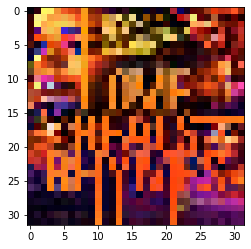

In [37]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(a/255)